## Лабораторная работа 4.7.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import tikzplotlib as tikz

In [2]:
def csvtotex(input, output, columns=None, rows=[-1], type=None, transp=False):
    df = pd.read_csv(input, sep=",", usecols=columns, quotechar='"', dtype=type)
    df = df[df.index.isin(rows)]
    if transp:
        df = df.transpose()
        pd.DataFrame.to_csv(df, output, sep="&", index=True)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in rows: data.write("|l")
            data.write("|l|}")
            data.write("\hline")
            content.pop(0)
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    else:
        pd.DataFrame.to_csv(df, output, sep="&", index=False)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in columns: data.write("|l")
            data.write("|}")
            data.write("\hline")
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    return df

In [3]:
def print_err(a, a_err, vis=True):
    a = np.array([a]).flatten()
    a_err = np.array([a_err]).flatten()
    val = np.zeros_like(a)
    sig = np.zeros_like(a_err)
    for i in range(a.size):
        val[i] = np.round(a[i], decimals = round(1 * (np.trunc(np.log10(a_err[i]) < 0)) - np.trunc(np.log10(a_err[i]))))
        sig[i] = np.round(a_err[i], decimals = round(1 * (np.trunc(np.log10(a_err[i]) < 0)) - np.trunc(np.log10(a_err[i]))))
        if vis: print(val[i], '\pm', sig[i])
    return val, sig

In [4]:
def T(n, x):
    return np.cos(n * np.arccos(x))

In [5]:
df = pd.read_csv('../data/data.csv')

>### Определение разрешённых направлений поляроидов

In [6]:
p1, p2 = df[df.columns[0:2]].head(1).values.reshape(-1,)
p_err = 5
print_err(p1, p_err)
print_err(p2, p_err)

170 \pm 5
50 \pm 5


(array([50]), array([5]))

>### Определение угла Брюстера для эбонита

Без светофильтра

In [7]:
p1, p2 = df[df.columns[3:5]].head(1).values.reshape(-1,)
p_err = 1

In [8]:
i = p1 - p2
i_err = p_err
print_err(i, i_err)

59 \pm 1


(array([59]), array([1]))

In [9]:
n = np.tan(i / 180 * np.pi)
n_err = (1 / np.cos(i / 180 * np.pi) ** 2) * (i_err / 180 * np.pi)
print_err(n, n_err)

1.66 \pm 0.07


(array([1.66]), array([0.07]))

Со светофильтром

In [10]:
p1, p2 = df[df.columns[5:7]].head(1).values.reshape(-1,)
p_err = 1

In [11]:
i = p1 - p2
i_err = p_err
print_err(i, i_err)

58 \pm 1


(array([58]), array([1]))

In [12]:
n = np.tan(i / 180 * np.pi)
n_err = (1 / np.cos(i / 180 * np.pi) ** 2) * (i_err / 180 * np.pi)
print_err(n, n_err)

1.6 \pm 0.06


(array([1.6]), array([0.06]))

>### Определение главных плоскостей двоякопреломляющих пластин

In [13]:
p1, p2 = df[df.columns[12:14]].head(1).values.reshape(-1,)
p_err = 1
print_err(p1, p_err)
print_err(p2, p_err)

56 \pm 1
74 \pm 1


(array([74]), array([1]))

>### Интерференция поляризованных лучей

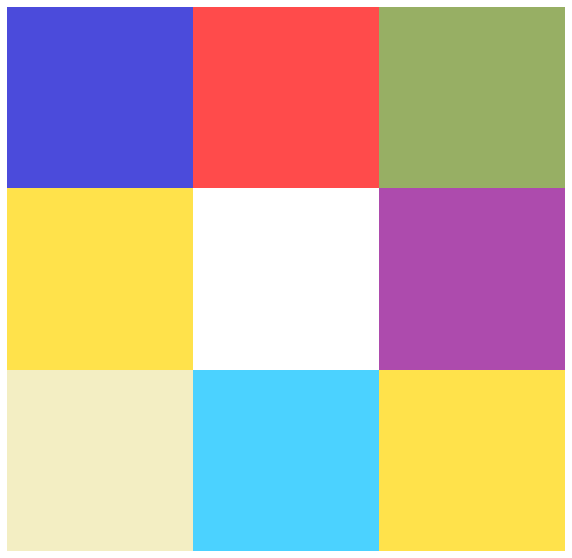

In [43]:
from matplotlib import patches

plt.figure(figsize=(10, 10))

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.axis('off')

color = [['mediumblue', 'red', 'olivedrab'],
         ['gold', 'white', 'darkmagenta'],
         ['palegoldenrod', 'deepskyblue', 'gold']]

for i in range(3):
    for j in range(3):
        left, bottom, width, height = (i, j, 1, 1)
        rect=patches.Rectangle((left, bottom), width ,height, facecolor=color[2-j][i], alpha=0.7)
        plt.gca().add_patch(rect)

plt.savefig('plot1.pdf')

plt.show()

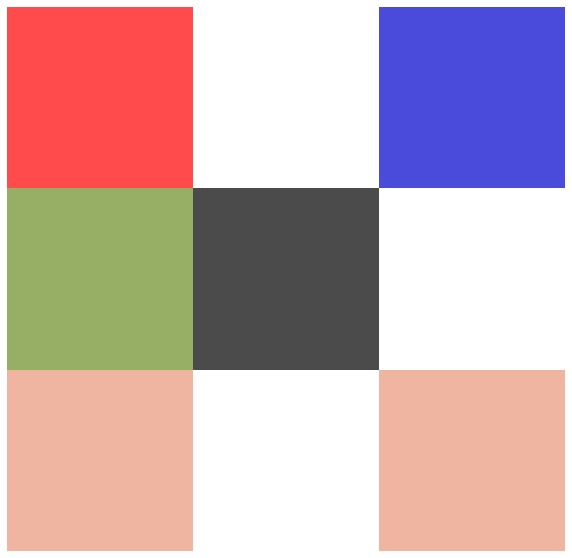

In [44]:
from matplotlib import patches

plt.figure(figsize=(10, 10))

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.axis('off')

color = [['red', 'white', 'mediumblue'],
         ['olivedrab', 'black', 'white'],
         ['darksalmon', 'white', 'darksalmon']]

for i in range(3):
    for j in range(3):
        left, bottom, width, height = (i, j, 1, 1)
        rect=patches.Rectangle((left, bottom), width ,height, facecolor=color[2-j][i], alpha=0.7)
        plt.gca().add_patch(rect)

plt.savefig('plot2.pdf')

plt.show()